# Nonlinear Regression

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Curve fitting using SciPy curve_fit 
- Use non-linear least squares to fit a function, f, to data.
- Assumes ydata = f(xdata, *params) + eps.
- returns popt (optimal values), pcov(estimated covariance of popt)

In [24]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

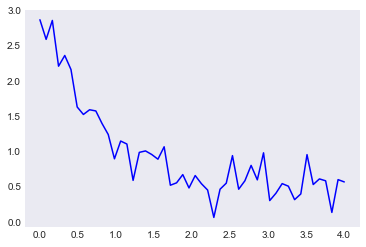

In [25]:
# data generation 
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')


[2.55423706 1.35190947 0.47450618]
Constrained:  [2.         1.         0.45978911]


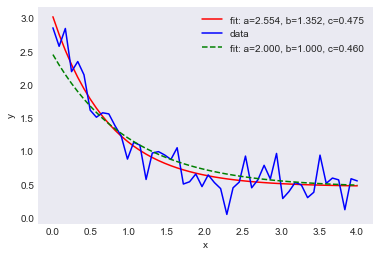

In [26]:
# Fit for the parameters a, b, c of the function func:
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Constrain the region of 0 <= a <= 2, 0 <= b <= 1 and 0 <= c <= 0.5:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [2., 1., 0.5]))
print("Constrained: ", popt)
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Nonlinear regression

Text(0.5, 1.0, 'Non Linear Data')

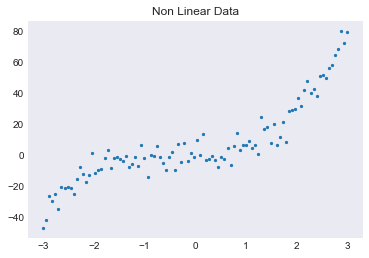

In [27]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score 

x = np.linspace(-3,3,100)
y = 2.1 * x**3 + 2.1 * x**2 + 1.4 * x + 0.9
y = y + np.random.randn(100) * 5.2

plt.scatter(x, y, s = 5) 
plt.title('Non Linear Data')

w: [12.71914069] b: 7.1375009482083085
MSE:  149.4927210828106 R2 score:  0.7680942222246133


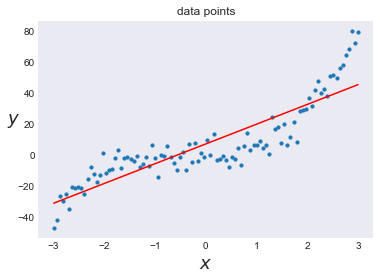

In [28]:
lrg = LinearRegression() 
lrg.fit(x.reshape(-1,1), y) 
print('w:', lrg.coef_, 'b:', lrg.intercept_) 
y_pred = lrg.predict(x.reshape(-1,1)) 
plt.scatter(x, y, s = 10) 
plt.xlabel("$x$", fontsize = 18) 
plt.ylabel("$y$", rotation = 0, fontsize = 18) 
plt.title("data points") 
plt.plot(x, y_pred, color ='r') 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

In [29]:
# now we make the model bit complex, e.g. degrees 2, and proceed with linear regression

poly_f = PolynomialFeatures(degree = 2, include_bias = False) 
x_poly = poly_f.fit_transform(x.reshape(-1,1)) 
x[:5], x_poly[:5]   # one more column for square of x introduced

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 array([[-3.        ,  9.        ],
        [-2.93939394,  8.64003673],
        [-2.87878788,  8.28741965],
        [-2.81818182,  7.94214876],
        [-2.75757576,  7.60422406]]))

In [30]:
# or, manually
x2 = np.c_[x, x**2]; x2[:5]

array([[-3.        ,  9.        ],
       [-2.93939394,  8.64003673],
       [-2.87878788,  8.28741965],
       [-2.81818182,  7.94214876],
       [-2.75757576,  7.60422406]])

w: [12.71914069  2.36863223] b: -0.11194920873109382
MSE:  107.46171336850506 R2 score:  0.8332962833287783


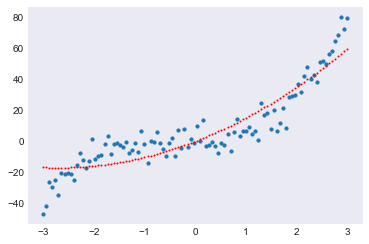

In [31]:
lrg = LinearRegression() 
lrg.fit(x_poly, y) 
print('w:', lrg.coef_, 'b:', lrg.intercept_) 
y_pred = lrg.predict(x_poly) 
plt.scatter(x, y, s = 10) 
plt.scatter(x, y_pred, c ='r', s=1) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

In [32]:
# try degree 3
poly_f = PolynomialFeatures(degree = 3, include_bias = False) 
x_poly = poly_f.fit_transform(x.reshape(-1,1)) 
x[0], x_poly[0]   # more columns introduced

(-3.0, array([ -3.,   9., -27.]))

w: [1.33100719 2.36863223 2.06742863] b: -0.1119492087310956
MSE:  31.919252152549316 R2 score:  0.9504841510487645


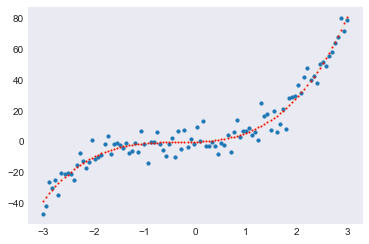

In [33]:
lrg = LinearRegression() 
lrg.fit(x_poly, y) 
print('w:', lrg.coef_, 'b:', lrg.intercept_) 
y_pred = lrg.predict(x_poly) 
plt.scatter(x, y, s = 10) 
plt.scatter(x, y_pred, c ='r', s=1) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

# exactly the same as y_pred
a, b, c = lrg.coef_[2], lrg.coef_[1], lrg.coef_[0]
xx = np.linspace(-3,3,100)
yy = a * xx**3 + b * x**2 + c *x + lrg.intercept_
plt.plot(xx, yy, c='y', alpha=0.1)

MSE:  14.77001418714949 R2 score:  0.9770875023010184


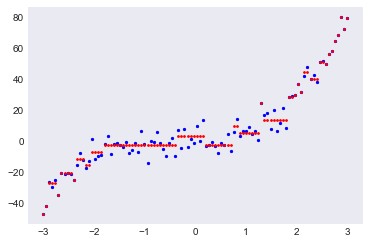

In [34]:
from sklearn.tree import DecisionTreeRegressor
lrg = DecisionTreeRegressor(max_depth=5) 
lrg.fit(x.reshape(-1,1), y) 

y_pred = lrg.predict(x.reshape(-1,1)) 
plt.scatter(x, y, c='b', s = 5) 
plt.scatter(x, y_pred, c ='r', s=3) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

MSE:  24.5391507728905 R2 score:  0.9619327897390918


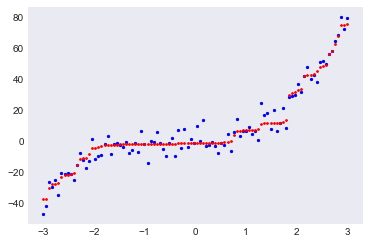

In [35]:
from sklearn.ensemble import RandomForestRegressor
lrg = RandomForestRegressor(n_estimators=200, max_depth=3) 
lrg.fit(x.reshape(-1,1), y) 

y_pred = lrg.predict(x.reshape(-1,1)) 
plt.scatter(x, y, c='b', s = 5) 
plt.scatter(x, y_pred, c ='r', s=3) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

MSE:  33.083607995031166 R2 score:  0.9486779035920171


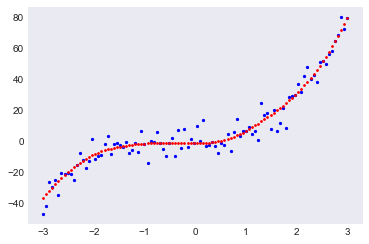

In [36]:
from sklearn.svm import SVR
lrg = SVR(C=1000) 
lrg.fit(x.reshape(-1,1), y) 

y_pred = lrg.predict(x.reshape(-1,1)) 
plt.scatter(x, y, c='b', s = 5) 
plt.scatter(x, y_pred, c ='r', s=3) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2) 

MSE:  27.020907573049186 R2 score:  0.9580828782730256


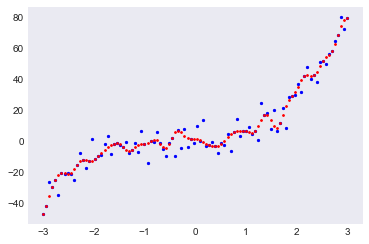

In [37]:
from sklearn.svm import SVR
lrg = SVR(C=1000, kernel='rbf', gamma=10) 
lrg.fit(x.reshape(-1,1), y) 

y_pred = lrg.predict(x.reshape(-1,1)) 
plt.scatter(x, y, c='b', s = 5) 
plt.scatter(x, y_pred, c ='r', s=3) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2) 

# Locally Weighted Regression
- non-parametric regression
- no training phase, and all the work is done during the testing phase (while making prediction)

In [38]:
import numpy as np
from ipywidgets import interact
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
import matplotlib.pyplot as plt
%matplotlib inline

output_notebook()
plt.style.use('seaborn-dark')
 
# function to perform locally weighted linear regression
def local_weighted_regression(x0, X, Y, tau):
    # add bias term
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
     
    # fit model: normal equations with kernel
    xw = X.T * weights_calculate(x0, X, tau)
    theta = np.linalg.pinv(xw @ X) @ xw @ Y

    # predict value
    return x0 @ theta
 
# function to perform weight calculation
def weights_calculate(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau **2) ))
 
# plot locally weighted regression for different bandwidth values
def plot_lwr(tau):
    # prediction
    domain = np.linspace(-3, 3, num=300)
    prediction = [local_weighted_regression(x0, X, Y, tau) for x0 in domain]
 
    plot = figure(plot_width=400, plot_height=400)
    plot.title.text = 'tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
     
    return plot
 
#define distribution
n = 1000
 
# generate dataset
X = np.linspace(-3, 3, num=n)
Y = np.abs(X ** 3 - 1)
 
# jitter X
X += np.random.normal(scale=.1, size=n)
 
# show the plots for different values of Tau
show(gridplot([
    [plot_lwr(10.), plot_lwr(1.)],
    [plot_lwr(0.1), plot_lwr(0.01)]
]))

Loading BokehJS ...